In [3]:
import pandas as pd
from prophet import Prophet

In [4]:
train_data = pd.read_csv('data/train.csv')

In [45]:
bitcoin = train_data[train_data['Asset_ID'] == 1]
bitcoin['ds'] = pd.to_datetime(bitcoin['timestamp'] * 1e9)
bitcoin['y'] = bitcoin['Target']
bitcoin = bitcoin.dropna()
bitcoin

/tmp/ipykernel_3666127/3672689392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin['ds'] = pd.to_datetime(bitcoin['timestamp'] * 1e9)
/tmp/ipykernel_3666127/3672689392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin['y'] = bitcoin['Target']


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,ds,y
2,1514764860,1,229.0,13835.19400,14013.80,13666.11,13850.176000,31.550062,13827.062093,-0.014643,2018-01-01 00:01:00,-0.014643
10,1514764920,1,235.0,13835.03600,14052.30,13680.00,13828.102000,31.046432,13840.362591,-0.015037,2018-01-01 00:02:00,-0.015037
18,1514764980,1,528.0,13823.90000,14000.40,13601.00,13801.314000,55.061820,13806.068014,-0.010309,2018-01-01 00:03:00,-0.010309
26,1514765040,1,435.0,13802.51200,13999.00,13576.28,13768.040000,38.780529,13783.598101,-0.008999,2018-01-01 00:04:00,-0.008999
34,1514765100,1,742.0,13766.00000,13955.90,13554.44,13724.914000,108.501637,13735.586842,-0.008079,2018-01-01 00:05:00,-0.008079
...,...,...,...,...,...,...,...,...,...,...,...,...
24236515,1632181200,1,2643.0,42632.46500,42736.90,42607.50,42703.636250,100.797218,42653.031385,0.002084,2021-09-20 23:40:00,0.002084
24236529,1632181260,1,2281.0,42718.81500,42819.38,42690.84,42781.970571,76.339988,42755.785162,0.003246,2021-09-20 23:41:00,0.003246
24236543,1632181320,1,2642.0,42772.92125,42827.10,42690.75,42755.592500,117.429123,42749.075916,0.003108,2021-09-20 23:42:00,0.003108
24236557,1632181380,1,2134.0,42762.29000,42811.30,42694.37,42717.234286,78.049458,42749.024591,0.002770,2021-09-20 23:43:00,0.002770


In [56]:
X_train = bitcoin[['ds', 'y']][-1000:-10]
X_test = bitcoin[['ds']][-10:]
Y_test = bitcoin[['ds', 'y']][-10:]

Y_test

,ds,y
24236445,2021-09-20 23:35:00,0.000125
24236459,2021-09-20 23:36:00,0.002026
24236473,2021-09-20 23:37:00,0.000634
24236487,2021-09-20 23:38:00,0.002059
24236501,2021-09-20 23:39:00,0.001714
24236515,2021-09-20 23:40:00,0.002084
24236529,2021-09-20 23:41:00,0.003246
24236543,2021-09-20 23:42:00,0.003108
24236557,2021-09-20 23:43:00,0.002770
24236571,2021-09-20 23:44:00,0.002726


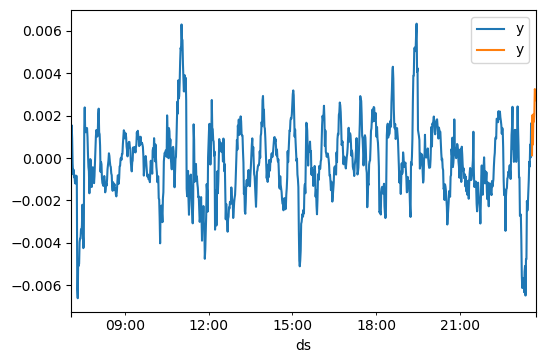

In [57]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=100)
ax = plt.subplot(1,1,1)
X_train.plot(x='ds', y='y', ax=ax)
Y_test.plot(x='ds', y='y', ax=ax)
plt.show()

In [58]:
m = Prophet()
m.fit(X_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -46.5658


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      77       819.613   0.000426448       65.7999   5.245e-06       0.001      147  LS failed, Hessian reset 
      99        819.63   5.05607e-06       72.4459      0.3343           1      179   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       819.635   3.96599e-05       63.0512   4.233e-07       0.001      262  LS failed, Hessian reset 
     199       819.639   7.64512e-07       70.9178       1.787      0.1787      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       819.639   3.90192e-08       69.5006      0.5654      0.5654      371   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [59]:
forecast = m.predict(X_test)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-20 23:35:00,-0.000776,-0.002917,0.001492,-0.000776,-0.000776,0.0,0.0,0.0,0.0,0.0,0.0,-0.000776
1,2021-09-20 23:36:00,-0.000779,-0.002837,0.001591,-0.000779,-0.000779,0.0,0.0,0.0,0.0,0.0,0.0,-0.000779
2,2021-09-20 23:37:00,-0.000782,-0.003129,0.001241,-0.000782,-0.000782,0.0,0.0,0.0,0.0,0.0,0.0,-0.000782
3,2021-09-20 23:38:00,-0.000785,-0.003089,0.001508,-0.000785,-0.000785,0.0,0.0,0.0,0.0,0.0,0.0,-0.000785
4,2021-09-20 23:39:00,-0.000788,-0.002977,0.001489,-0.000788,-0.000788,0.0,0.0,0.0,0.0,0.0,0.0,-0.000788
5,2021-09-20 23:40:00,-0.000791,-0.002861,0.001406,-0.000791,-0.000791,0.0,0.0,0.0,0.0,0.0,0.0,-0.000791
6,2021-09-20 23:41:00,-0.000794,-0.002984,0.001476,-0.000794,-0.000794,0.0,0.0,0.0,0.0,0.0,0.0,-0.000794
7,2021-09-20 23:42:00,-0.000797,-0.003128,0.001387,-0.000797,-0.000797,0.0,0.0,0.0,0.0,0.0,0.0,-0.000797
8,2021-09-20 23:43:00,-0.000800,-0.003053,0.001376,-0.000800,-0.000800,0.0,0.0,0.0,0.0,0.0,0.0,-0.000800
9,2021-09-20 23:44:00,-0.000803,-0.003144,0.001491,-0.000803,-0.000803,0.0,0.0,0.0,0.0,0.0,0.0,-0.000803


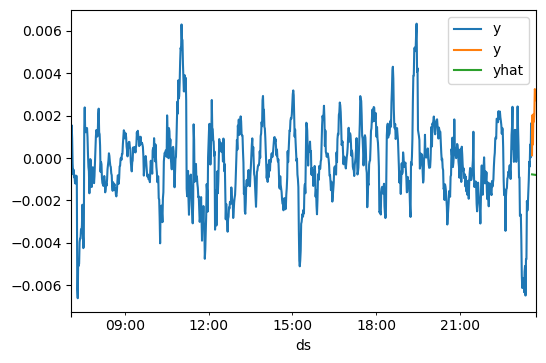

In [60]:
import matplotlib.pyplot as plt

fig = plt.figure(dpi=100)
ax = plt.subplot(1,1,1)
X_train.plot(x='ds', y='y', ax=ax)
Y_test.plot(x='ds', y='y', ax=ax)
forecast.plot(x='ds', y='yhat', ax=ax)
plt.show()